# Iris Dataset

## Objective:
To perform classification analysis on Iris dataset. Perform any two classification  algorithms and compare the accuracy.

### Prerequisites

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\Lekuid\JupyterNotebooks\Verzeo\aMinor_IRIS\IrisData.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

Three different species from the Iris genus.\
We have Sepal and Petal dimensions given along with a ID tag. No values missing.\
Prediction Output needs to be a trained model which can classify between them.

### Visualization

In [7]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [8]:
#Adding a new feature to make cleaner plots and it is a functionality that will be used for running models too.
def num_species(value):
  if value == 'Iris-setosa':
    return 1
  elif value == 'Iris-versicolor':
    return 2
  else:
    return 3
df['NumSp'] = df.apply(lambda x: num_species(x['Species']), axis=1)

In [9]:
df['NumSp'].value_counts()

3    50
2    50
1    50
Name: NumSp, dtype: int64

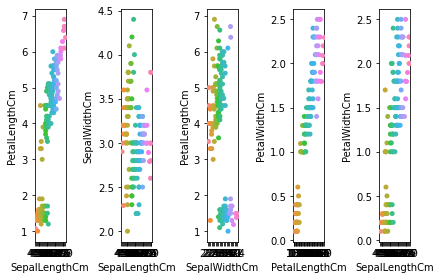

In [44]:
fig, ax = plt.subplots(1,5)
sns.stripplot(x='SepalLengthCm', y='PetalLengthCm', data=df, ax=ax[0])
sns.stripplot(x='SepalLengthCm', y='SepalWidthCm', data=df, ax=ax[1])
sns.stripplot(x='SepalWidthCm', y='PetalLengthCm', data=df, ax=ax[2])
sns.stripplot(x='PetalLengthCm', y='PetalWidthCm', data=df, ax=ax[3])
sns.stripplot(x='SepalLengthCm', y='PetalWidthCm', data=df, ax=ax[4])
fig.tight_layout()

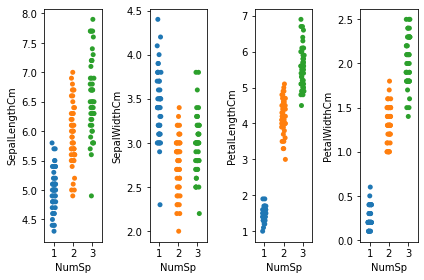

In [45]:
fig, ax = plt.subplots(1,4)
sns.stripplot(x='NumSp', y='SepalLengthCm', data=df, ax=ax[0])
sns.stripplot(x='NumSp', y='SepalWidthCm', data=df, ax=ax[1])
sns.stripplot(x='NumSp', y='PetalLengthCm', data=df, ax=ax[2])
sns.stripplot(x='NumSp', y='PetalWidthCm', data=df, ax=ax[3])
fig.tight_layout()

Distinct feature spacing

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

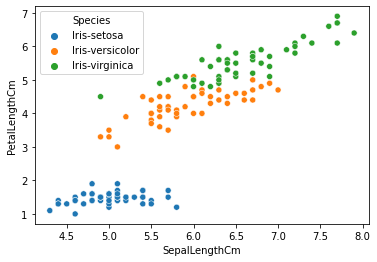

In [12]:
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue = 'Species', data = df)

Linear classifier might be a good fit for this case.\
Are the outliers here significant enough to take note of?


In [13]:
#df[50:100] == 'Iris-versicolor'

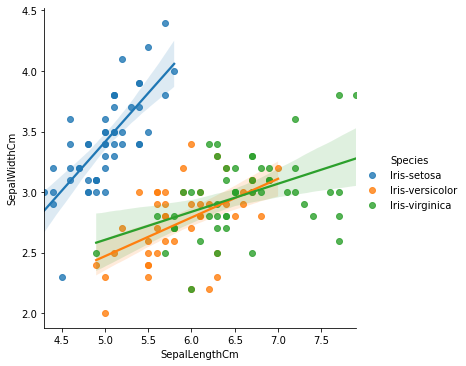

In [14]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df);

Plotting with sns.implot to get a relation and regression fit. \
Sepal Length and Width are similar between Versicolor and Virginica, whereas Setosa is distinctively different.

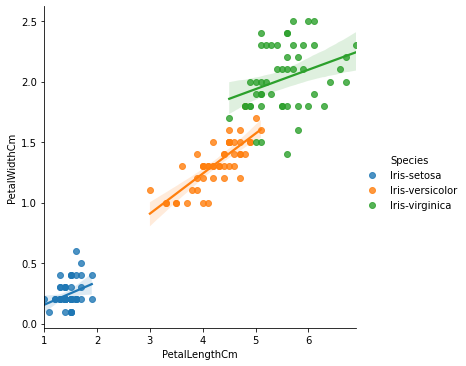

In [15]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df);

Petal Length and Width shows a positive and linear relation between the three Iris species.

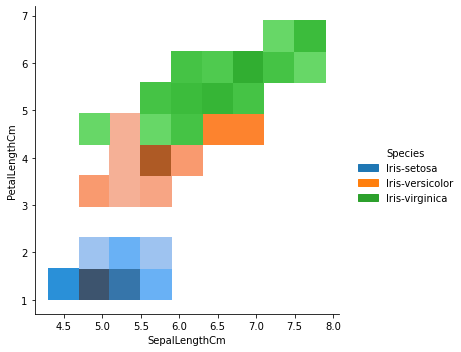

In [16]:
sns.displot(x='SepalLengthCm', y='PetalLengthCm', hue = 'Species', data = df)

Taking all the visualizations in consideration, Iris-Setosa is very easily regonizable and distinctively smaller in Petal Length but has the highest Sepal Width compared to the other two genus, followed by Versicolor which falls closer to Virginica in context of size with both having almost similar Speal sizes. Virginica is the largest of the three with the longest Petal and Sepal for most cases.

I tried out different methods of plotting, \
Explored a variety of graphs, \
and the functionality of printing multiple plots using subplot axs.

## Model Training

In [19]:
from sklearn import model_selection
from sklearn.tree import *
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
cols = ['Species', 'NumSp', 'Id']
features = df.drop(cols, axis=1)
x_Data = features
y_Data = df['NumSp']
x_Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x_Data, y_Data, test_size=0.4)

In [22]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,NumSp
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [23]:
y_Data.head()

0    1
1    1
2    1
3    1
4    1
Name: NumSp, dtype: int64

In [24]:
y_Data.value_counts()

3    50
2    50
1    50
Name: NumSp, dtype: int64

In [25]:
x_Train.shape

(90, 4)

In [26]:
x_Test.shape

(60, 4)

In [27]:
y_Train.shape

(90,)

In [28]:
y_Test.shape

(60,)

In [29]:
df.NumSp.value_counts()

3    50
2    50
1    50
Name: NumSp, dtype: int64

### DesicionTreeClassifier

In [30]:
Model1 = DecisionTreeClassifier() #Desicion Tree 
Model1 = Model1.fit(x_Train, y_Train)

In [31]:
Treepredictions = Model1.predict(x_Test)
Score = metrics.accuracy_score(y_Test, Treepredictions) * 100
print(list(Treepredictions))
print(Score)

[2, 2, 2, 2, 3, 1, 2, 3, 1, 1, 3, 1, 1, 2, 3, 2, 3, 3, 2, 2, 2, 3, 1, 3, 2, 1, 1, 1, 1, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 1, 3, 3, 1, 2, 3, 1, 3, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 2]
93.33333333333333


In [32]:
metrics.accuracy_score?

Different Test/Train situations for Desicion Tree

In [41]:
#dIfferent test sizes alters the results
#Change Range
Range = 10
for x in range(1, Range):
  x_Train, x_Test, y_Train, y_Test = train_test_split(x_Data, y_Data, test_size=x/10)
  TestSize = len(x_Train)/len(x_Test)
  Treepredictions = Model1.predict(x_Test)
  print(f'Accuracy: {round(metrics.accuracy_score(y_Test, Treepredictions)* 100, 2)}% with {round(TestSize*10, 2)}% as training data')
  

Accuracy: 100.0% with 90.0% as training data
Accuracy: 96.67% with 40.0% as training data
Accuracy: 100.0% with 23.33% as training data
Accuracy: 98.33% with 15.0% as training data
Accuracy: 98.67% with 10.0% as training data
Accuracy: 96.67% with 6.67% as training data
Accuracy: 98.1% with 4.29% as training data
Accuracy: 97.5% with 2.5% as training data
Accuracy: 97.78% with 1.11% as training data


Not very sure why the results are so high but I believe it is so as most of the data are easily classifiable into binary desicions and the results slightly decline as Test space is increased over Training space.

In [34]:
Check = 9 #Change
print(Treepredictions[0:Check])
print(y_Test[0:Check])

[2 2 1 2 2 3 1 1 2]
62     2
90     2
30     1
52     2
74     2
138    3
36     1
49     1
63     2
Name: NumSp, dtype: int64


### Linear Regression

In [35]:
Model2 = LinearRegression()
Model2 = Model2.fit(x_Train, y_Train)
Model2.score(x_Train, y_Train)
Model2.coef_
Model2.intercept_
#prediction

LinRegpredictions = Model2.predict(x_Test) #float results in range 1 to 3
#rounding off
LinRegpredictions[:10]

array([1.75302954, 1.86179249, 0.97251014, 2.10711846, 1.94900801,
       2.35014571, 0.95994563, 0.96227222, 2.01851611, 2.91404606])

Different Test/Train situations for Linear Regreression

In [47]:
Range = 10
for x in range(1, Range):
  x_Train, x_Test, y_Train, y_Test = train_test_split(x_Data, y_Data, test_size=x/10)
  TestSize = len(x_Train)/len(x_Test)
  LinRegpredictions = Model2.predict(x_Test)
  LinRegpredictions = [round(x) for x in LinRegpredictions]
  print(f'Accuracy: {round(metrics.accuracy_score(y_Test, LinRegpredictions)* 100, 2)}% with {round(TestSize*10, 2)}% as training data')

Accuracy: 80.0% with 90.0% as training data
Accuracy: 90.0% with 40.0% as training data
Accuracy: 91.11% with 23.33% as training data
Accuracy: 86.67% with 15.0% as training data
Accuracy: 86.67% with 10.0% as training data
Accuracy: 85.56% with 6.67% as training data
Accuracy: 87.62% with 4.29% as training data
Accuracy: 86.67% with 2.5% as training data
Accuracy: 84.44% with 1.11% as training data


In [37]:
print(LinRegpredictions[0:5])
print(y_Test[0:5])

[3, 1, 1, 2, 2]
139    3
20     1
35     1
58     2
64     2
Name: NumSp, dtype: int64
